MNIST
- "hello world" of machine learning
- set of 70,000 small images of handwritten digits
- Each image has 784 features (28x28 pixels; each pixel has intensity from 0 (white) to 255 (black)).
28*28=784
- 


In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)

/home/malayaja/anaconda3/envs/handsonml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
X, y = mnist.data, mnist.target

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
X.shape, y.shape

((70000, 784), (70000,))

In [9]:
import matplotlib.pyplot as plt

In [12]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

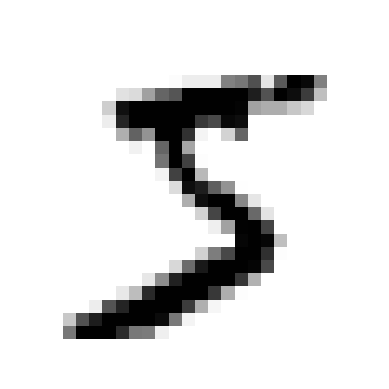

In [13]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [14]:
y[0]

'5'

In [15]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

## Training a Binary Classifier

In [16]:
y_train_5 = (y_train=="5")
y_test_5 = (y_test=="5")

In [17]:
y_train_5[:5], y_test_5[:5]

(array([ True, False, False, False, False]),
 array([False, False, False, False, False]))

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

### 1. Measuring Accuracy Using Cross-Validation 

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Wow, 95% + accuracy?<br>
Before we get too excited, let's look at a dummy classifier that classifies every single image in the most frequent class, which is the negative class (i.e. not 5) in this case.

In [24]:
from sklearn.dummy import DummyClassifier

In [25]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [27]:
dummy_clf.predict(X_train)

array([False, False, False, ..., False, False, False])

In [28]:
any(dummy_clf.predict(X_train))

False

In [29]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

- The dummy classifier has 90% + accuracy! Doesn't make sense, does it.
- This demonstrates why accuracy is generally not the preferred performance measure for classifiers, esp when dealing with skewed datasets.
- What's better? The confusion matrix.

### 2. Confusion Matrices

In [30]:
from sklearn.model_selection import cross_val_predict

In [31]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

- row represents actual class, column represents predicted class.

<img src="ConfusionMatrix.png">

Precision = TP/(TP + FP)<br>
Recall = TP/(TP + FN)

### 3. Precision and Recall

### 4. Precision/Recall Trade-Off

## Multiclass Classification

## Error Analysis

## Multilabel Classification